# 検定とモデル選択

有意差主義
- とりあえず検定
- なんとか有意差出す
- 出ればどんな議論してもオーケー

こういう立場とは逆立場をとる．
- データをよく見てよく考えて
- 統計モデルで現象を説明

## ポアソン回帰とモデル選択の復習

In [1]:
d <- read.csv("data3a.csv")

In [2]:
head(d)

y,x,f
6,8.31,C
6,9.44,C
6,9.50,C
12,9.07,C
10,10.16,C
4,8.32,C


In [3]:
fit2 <- glm(y ~ x, data = d, family = poisson)
fit2


Call:  glm(formula = y ~ x, family = poisson, data = d)

Coefficients:
(Intercept)            x  
    1.29172      0.07566  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    89.51 
Residual Deviance: 84.99 	AIC: 474.8

In [4]:
fit1 <- glm(y ~ 1, data = d, family = poisson)
fit1


Call:  glm(formula = y ~ 1, family = poisson, data = d)

Coefficients:
(Intercept)  
      2.058  

Degrees of Freedom: 99 Total (i.e. Null);  99 Residual
Null Deviance:	    89.51 
Residual Deviance: 89.51 	AIC: 477.3

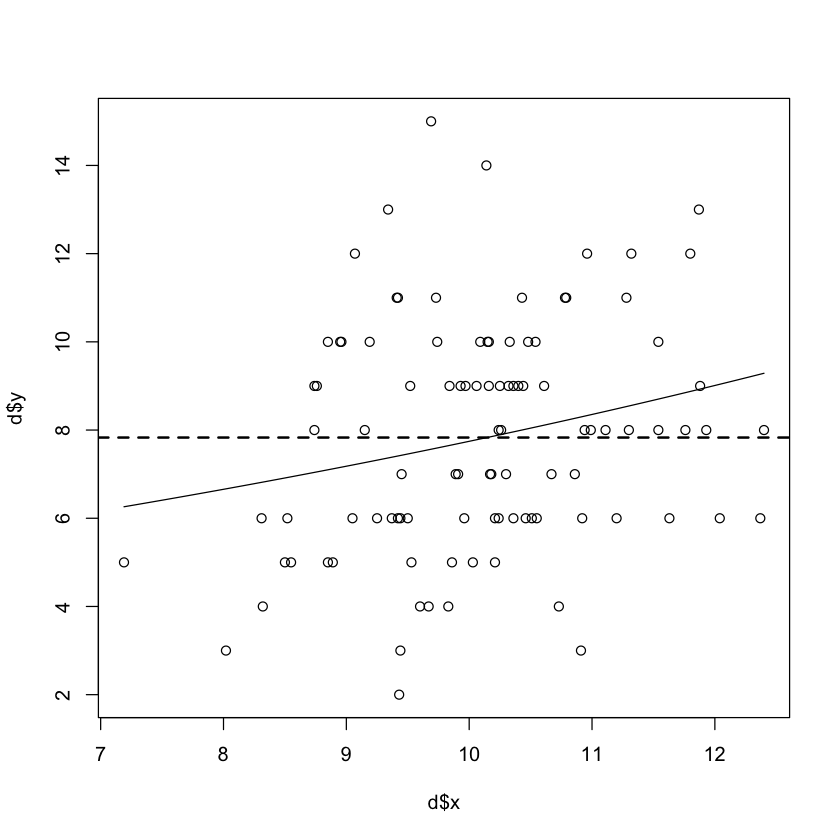

In [10]:
plot(d$x, d$y)
xx <- seq(min(d$x), max(d$x), length = 50)
abline(h = mean(d$y), lty = 2, lwd = 2)
lines(xx, exp(1.29 + 0.0757 * xx))

## モデル選択と検定を比較してみよう

>まずそもそもモデル 1 と 2 を比較するときに，モデル 2 の「植物のサイ ズ xi に依存している (個体 i の種子数平均 λi が xi の関数である) といった ことが言えるかどうか，がデータ解析の目的であるとおきます.

>そうした場合，「サイズ xi なんかに依存してないぢゃん」ということになっ てるモデル 1 (パラメーター数 1) のほうは，検定の文脈では帰無仮説 (null hypothesis) という奇妙な名前で呼ばれることになります.モデル 2 (パラ メーター数 2) は対立仮説 (alternative hypothesis) というこれまた趣旨の わかりにくい名前になります.ともかくそういうものだということにしま しょう.


## Deviance 差を調べる尤度比検定

>では，検定ではこのあたりをどう考えるのでしょうか? パラメーター数の少 ないモデル 1 よりパラメーター数の多いモデル 2 のほうがあてはまりが良 い (deviance が小さい) のはあたりまえだ，というところは同じです.そし て deviance 差に注目します. 11 このように deviance 差に注目する検定が 尤度比検定 (likelihood ratio test) です.


尤度比検定のご利益
- どんな統計モデルであっても最尤推定法によってパラメーターを推定 している場合に「検定」できる
  - つまりどんな確率分布を使っている場合でも使える，ということ
- モデル 1 (単純モデル) vs モデル 2 (複雑モデル) 対決のような状況では最強力検定である (Neyman-Pearson の補題)
- Deviance を使うのでモデル選択との対応関係を考えやすい


## 二種類の過誤と統計学的検定の非対称性

>さて，尤度比検定の検定統計量が deviance 差である，というところまでハ ナシがすすみました.

deviance差4.5は大きい？小さい？

>検定ではモデル 1 よりモデル 2 のほうが良い (解釈 B)，と判断することを 「帰無仮説の棄却」，その逆にモデル 1 のほうがよい (解釈 A) と判断する
ことを「帰無仮説が棄却できなかった」とよびます.

>統計学的検定は第一種の過誤のみを調べる (検定の非対称性)，つまり植 物の種子数の大小に関して実際にはサイズ xi が影響してないのに「サイズ は重要だ!」などと主張してやがるかどうかの監視に専念する，ということ です.

## 尤度比検定の計算の手順

1. まずは帰無仮説，つまりモデル 1 のような単純モデルが正しいものだ
と仮定する
2. つまり観測データはモデル 1 によって生成されたのだ
3. そのように生成された観測データにモデル 2 のような複雑モデルをあ てはめると deviance が小さくなるのはあたりまえのことだ
4. モデル 1 と 2 の deviance 差 16 が 4.5 ぐらいというもよくあることだ ろう
5. ということで deviance 差が 4.5 ぐらい，あるいはそれ以上になる確率 P を計算してみよう

- P ≥ α : 帰無仮説は棄却できない......
- P < α : 帰無仮説は棄却，モデル 1 が無くなったので，もういっぽう の「種子数はサイズ xi に依存」なモデル 2 で説明できる

$\alpha$はこっちが決めるし，第一の過誤しか考慮しない．

>あちこちで考えるのがイヤになったおかげで，問題は整理されてきました. 残された問題は「モデル 1 と 2 の deviance 差 4.5 ぐらいってのはよくある ことなのか? 「モデル 1 が正しい世界」において検定統計量である deviance 差 4.5 ぐらいあるいはそれ以上になる (すなわち第一種の過誤をおかす) 確 率 P ってどうやって計算すればいいんだ?」というところまで限定されてき ました.

## 方法 (1) 万能なる parametric bootstrap 尤 度比検定

In [11]:
fit2


Call:  glm(formula = y ~ x, family = poisson, data = d)

Coefficients:
(Intercept)            x  
    1.29172      0.07566  

Degrees of Freedom: 99 Total (i.e. Null);  98 Residual
Null Deviance:	    89.51 
Residual Deviance: 84.99 	AIC: 474.8

In [12]:
sort(names(fit2))

[1] "aic"               "boundary"          "call"             
 [4] "coefficients"      "contrasts"         "control"          
 [7] "converged"         "data"              "deviance"         
[10] "df.null"           "df.residual"       "effects"          
[13] "family"            "fitted.values"     "formula"          
[16] "iter"              "linear.predictors" "method"           
[19] "model"             "null.deviance"     "offset"           
[22] "prior.weights"     "qr"                "R"                
[25] "rank"              "residuals"         "terms"            
[28] "weights"           "xlevels"           "y"

In [13]:
fit2$deviance

[1] 84.993

In [14]:
# deviance差
fit1$deviance - fit2$deviance

[1] 4.513941

帰無仮説が正しい，モデル1（単純モデル）が正しいと仮定．

In [22]:
d$y.rnd <- rpois(100, lambda = mean(d$y))

In [23]:
# モデル1を仮定した上でのdeviance差
fit1 <- glm(y.rnd ~ 1, data = d, family = poisson)
fit2 <- glm(y.rnd ~ x, data = d, family = poisson)
fit1$deviance - fit2$deviance

[1] 0.1357477

In [20]:
head(d)

y,x,f,y.rnd
6,8.31,C,7
6,9.44,C,8
6,9.50,C,4
12,9.07,C,8
10,10.16,C,7
4,8.32,C,8


deviance差の分布を作る

In [27]:
pb <- function(d, n.bootstrap)
{
    n.sample <- nrow(d) # データ数
    y.mean <- mean(d$y) # 標本平均
    v.d.dev12 <- sapply( # PB による deviance 差の推定計算
            1:n.bootstrap,
            function(i) {
                d$y.rnd <- rpois(n.sample, lambda = y.mean)
                fit1 <- glm(y.rnd ~ 1, data = d, family = poisson)
                fit2 <- glm(y.rnd ~ x, data = d, family = poisson)
                fit1$deviance - fit2$deviance # deviance 差を返す
            }
    )
    v.d.dev12 # deviance 差 vector を返す
}

In [28]:
diff.dev12 <- pb(d, n.bootstrap = 1000)

In [29]:
summary(diff.dev12)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000004 0.090700 0.468345 0.959770 1.282382 8.774549 

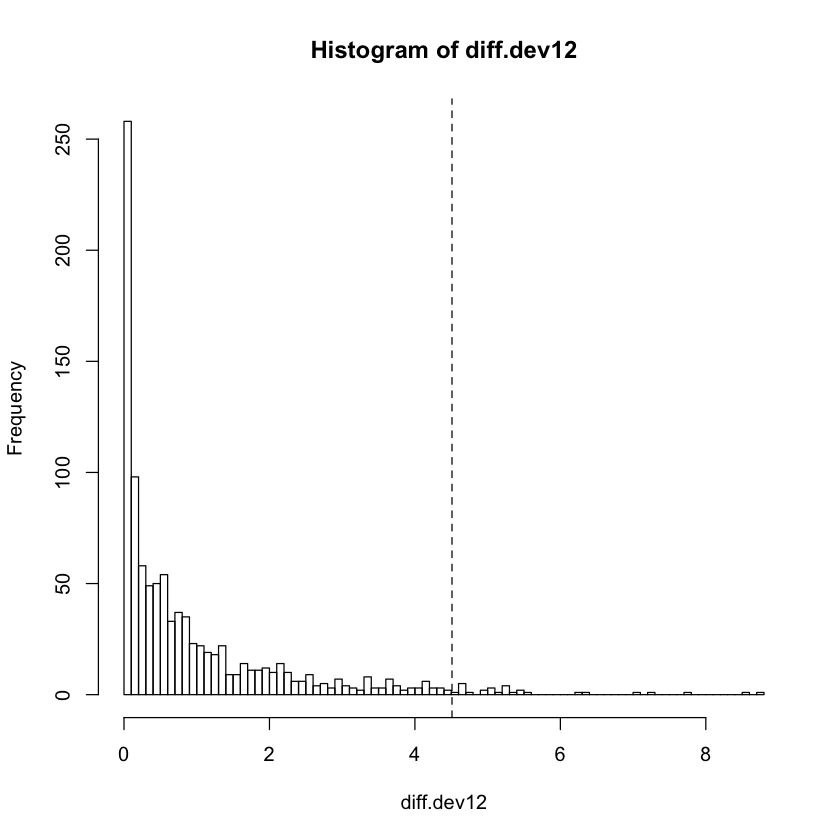

In [31]:
hist(diff.dev12, 100)
abline(v = 4.51, lty = 2)

In [32]:
sum(diff.dev12 >= 4.51)

[1] 28

In [33]:
quantile(diff.dev12, 0.95)

95% 
3.798648

有意差あり

ここで紹介した parametric bootstrap 法による尤度比検定の特徴は次 のようなものです.
- 統計モデルが明確に定義されていれば，必ず「検定統計量 28 の分布」 を乱数によって生成できて，それによって P 値が計算できる汎用性の高い方法
- すなわち，統計モデルと parametric bootstrap 法の知識さえあればど んな検定でも可能; 既存の検定が適用できない状況でも検定統計量を 計算できてしまう
- ただし，ちょっとばかり計算時間を費す


## 方法 (2) χ2 分布を使った古典的なる尤度比検定

In [35]:
fit1 <- glm(y ~ 1, data = d, family = poisson) # モデル 1
fit2 <- glm(y ~ x, data = d, family = poisson) # モデル 2 
anova(fit1, fit2, test = "Chisq") # 尤度比検定

Resid. Df,Resid. Dev,Df,Deviance,Pr(>Chi)
99,89.50694,NA,NA,NA
98,84.99300,1,4.513941,0.03361969


>ここでは (diff.dev12 に格納されてるような) deviance 差の確率分布に が自由度 1 31 の χ2 分布になるはずだ 32 という性質を利用して，その χ2 分布 (上の例では "Chisq" と指定) から deviance 差が 4.51 になる P 値は 0.034 というふうに計算しています.

## 検定はそんなにエラいのか?

>あらかじめ有意水準 α を 0.05 とか決めておいて， 33 P < α ならば
- P < α : 帰無仮説は棄却，モデル 1 が無くなったので，もういっぽう
の「種子数はサイズ xi に依存」なモデル 2 で説明できる と結論するものでした.では P ≥ α だったらどうなるのでしょうか? この
場合は
- P ≥ α : 帰無仮説は棄却できない......だからといって「モデル 2 より
モデル 1 がよい」とは断定できない，よくわからない

>と結論するのが統計学的検定の正しい結論 ということになります.「帰無仮
説が棄却できないときは帰無仮説が正しいんだ!」というハナシをときどき 聞かされますが，これは統計学的な根拠が何もない単なるまちがいです